In [1]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns,warnings
from sklearn.metrics import silhouette_samples,silhouette_score,accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
X,y = make_blobs(n_samples=500,n_features=2,centers=4,cluster_std=1,center_box=(-10.0,10.0),shuffle=True,random_state=1)

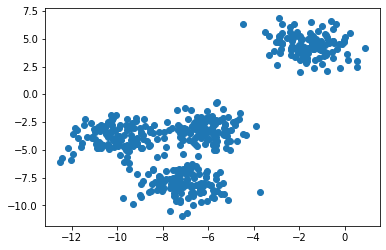

In [3]:
plt.scatter(X[:,0],X[:,1]);

In [4]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)

NearestNeighbors(n_neighbors=2)

In [5]:
distances,indices = nbrs.kneighbors(X)

In [6]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]
len(distances)

500

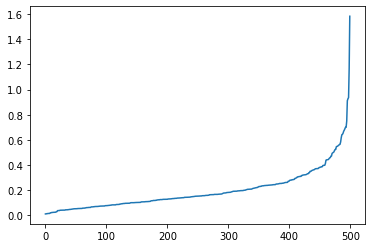

In [7]:
plt.plot(distances);

In [13]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1,min_samples=5).fit(X)

In [15]:
dbscan.labels_

array([ 0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  1,
        0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,
        1,  0,  1,  0,  0,  1,  1,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        1,  0,  1,  1,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  1,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        0,  0,  0,  0,  0

In [10]:
np.unique(dbscan.labels_)

array([-1,  0,  1], dtype=int64)

In [11]:
### DBSCAN không thế dự đoán trên tập dữ liệu mới, dữ liệu mới bỏ vào rồi quét lại một lần nữa
### K-means thì được

In [12]:
silhouette_avg = silhouette_score(X,dbscan.labels_)
silhouette_avg

0.6211442159069553